In [1]:
import pickle

with open("../../data/pre_process/graph_construction/both.pkl", "rb") as f:
    graph = pickle.load(f)

In [11]:
rule1 = {}
rule2 = {}

for central_node in [n for n,data in graph.nodes(data=True) if data.get("node_type") == 1]:

    for _, neighbor, edge_data in graph.edges(central_node, data=True):

        # Initialization
        if central_node not in rule1:
            rule1[central_node] = {}

        if central_node not in rule2:
            rule2[central_node] = {}

        # Path
        if "path" in edge_data["label"] :

            # Rule 1
            rule1[central_node]["path"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

            # Rule 2
            rule2[central_node]["path"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

        # IP_src
        elif edge_data["label"] == "ip_src":

            rule1[central_node]["ip_src"] ={
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

            rule2[central_node]["ip_src"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

        # IP_dst
        elif edge_data["label"] == "ip_dst":

            rule1[central_node]["ip_dst"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

            rule2[central_node]["ip_dst"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }



In [ ]:
rule1 = {key:value for key, value in rule1.items() if "ip_src" in value and "path" in value}
rule2 = {key:value for key, value in rule2.items() if "ip_dst" in value and "path" in value}

In [14]:
def find_match(rule1, rule2):

    node_matches = []
    for node1 in rule1:

        for node2 in rule2:

            if rule1[node1]["path"] == rule2[node2]["path"]:

                if rule1[node1]["ip_src"] == rule2[node2]["ip_dst"]:

                    if "ip_src" in rule2[node2]:
                        node_matches.append((node1, node2, rule1[node1]["path"]["neighbor"], rule1[node1]["ip_src"]["neighbor"], rule1[node1]["ip_dst"]["neighbor"], rule2[node2]["ip_src"]["neighbor"]))

                    # if len (node_matches) % 1 == 0:
                    #     return node_matches
    return node_matches

node_matches = find_match(rule1, rule2)

In [24]:
node_matches_unpack = []
for i in range(1):
    node_matches_unpack += list(node_matches[i])
node_matches_unpack = list(set(node_matches_unpack))

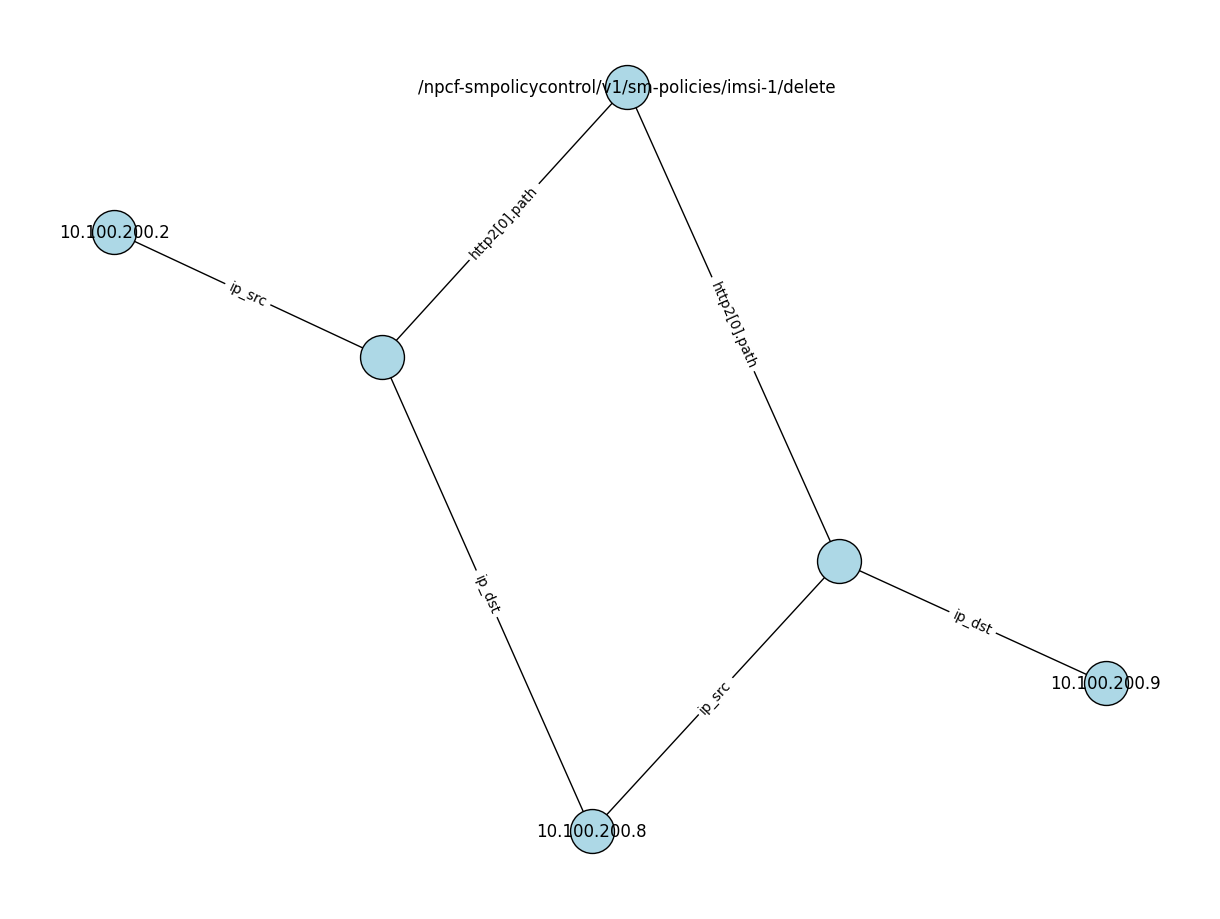

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

subG = graph.subgraph(list(node_matches_unpack)).copy()  # .copy() pour rendre le sous-graphe modifiable
plt.figure(figsize=(4*3,3*3))

node_labels = {n: subG.nodes[n].get("label", str(n)) for n in subG.nodes()}
edge_labels = nx.get_edge_attributes(subG, "label")

pos = nx.spring_layout(subG)  # ou kamada_kawai_layout, shell_layout, etc.
nx.draw(subG, pos, labels=node_labels, with_labels=True, node_color='lightblue', edgecolors='black', node_size=1000)
nx.draw_networkx_edge_labels(subG, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
rule1 = {}
rule2 = {}

for central_node in [n for n,data in graph.nodes(data=True) if data.get("node_type") == 1]:

    for _, neighbor, edge_data in graph.edges(central_node, data=True):

        # Initialization
        if central_node not in rule1:
            rule1[central_node] = {}

        if central_node not in rule2:
            rule2[central_node] = {}

        # Path
        if "path" in edge_data["label"] :

            # Rule 1
            rule1[central_node]["path"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

            # Rule 2
            rule2[central_node]["path"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

        # IP_src
        elif edge_data["label"] == "ip_src":

            rule1[central_node]["ip_src"] ={
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

            rule2[central_node]["ip_src"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

        # IP_dst
        elif edge_data["label"] == "ip_dst":

            rule1[central_node]["ip_dst"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }

            rule2[central_node]["ip_dst"] = {
                "neighbor": neighbor,
                "value" : graph.nodes[neighbor]["label"]
            }



Node: 0, Label: 
Node: 21, Label: 
Node: 25, Label: 
Node: 26, Label: 
Node: 32, Label: 
Node: 37, Label: 
Node: 38, Label: 
Node: 47, Label: 
Node: 48, Label: 
Node: 49, Label: 
Node: 50, Label: 
Node: 53, Label: 
Node: 56, Label: 
Node: 57, Label: 
Node: 58, Label: 
Node: 59, Label: 
Node: 62, Label: 
Node: 63, Label: 
Node: 72, Label: 
Node: 73, Label: 
Node: 74, Label: 
Node: 75, Label: 
Node: 77, Label: 
Node: 78, Label: 
Node: 79, Label: 
Node: 80, Label: 
Node: 82, Label: 
Node: 83, Label: 
Node: 84, Label: 
Node: 85, Label: 
Node: 87, Label: 
Node: 88, Label: 
Node: 94, Label: 
Node: 96, Label: 
Node: 97, Label: 
Node: 102, Label: 
Node: 104, Label: 
Node: 107, Label: 
Node: 108, Label: 
Node: 109, Label: 
Node: 115, Label: 
Node: 116, Label: 
Node: 118, Label: 
Node: 128, Label: 
Node: 133, Label: 
Node: 134, Label: 
Node: 135, Label: 
Node: 136, Label: 
Node: 138, Label: 
Node: 139, Label: 
Node: 140, Label: 
Node: 141, Label: 
Node: 142, Label: 
Node: 143, Label: 
Node: 145,